In [1]:
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_coverage(output, budget, title, i):
    plt.plot(np.arange(budget), output['coverage'], label='run #'+str(i+1))
    plt.xlabel('Number of Input Used')
    plt.ylabel('Number of Lines Covered')
    plt.title(title)
    plt.legend()

# Q1
## Cgi Grammar

In [3]:
cgi_gram = {
"<start>": ["<cgi-str>"],
"<cgi-str>": ["<section><section><section><section>"],
"<section>":["+","%<hex-c><hex-c>","<str>"],
"<hex-c>":["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f","A","B","C","D","E","F"],
"<str>":["<char><char><char><char> "],
"<char>":["a","z","e","r","t","y","u","i","o","p","q","s","d","f","g","h","j","k","l","m","w","x","c","v","b","n"]
}

cgi_grammar = AbstractGrammar(cgi_gram)

cgi_input = cgi_grammar.generate_input()

print(cgi_input)

xwkn +%dC%Ea


In [4]:
from cgi_decode import cgi_decode
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.fuzzers.cgi_fuzzer import CGIFuzzer
from poly_fuzzer.power_schedules.cgi_power_schedule import CGI_Power_schedule


In [5]:
def cgi_basic(budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed("avbaze"), AbstractSeed("afnzie%12")]

    fuzzer = CGIFuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [6]:
a = cgi_basic()

In [7]:
def cgi_power(budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed("avbaze"), AbstractSeed("afnzie%12")]
    powerschedule = CGI_Power_schedule()

    fuzzer = CGIFuzzer(executor,seeds,power_schedule=powerschedule)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [8]:
a = cgi_power()

In [9]:
def cgi_w_grammar(grammar,budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed(cgi_grammar.generate_input()) for i in range(8)]
    fuzzer = CGIFuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [10]:
a = cgi_w_grammar(cgi_grammar)

In [11]:
def cgi_w_grammar_power(grammar,budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed(cgi_grammar.generate_input()) for i in range(8)]
    powerschedule = CGI_Power_schedule()
    fuzzer = CGIFuzzer(executor,seeds,power_schedule=powerschedule)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [12]:
a = cgi_w_grammar_power(cgi_grammar)

In [13]:
basic_out = cgi_basic()
power_out = cgi_power()
gram_out = cgi_w_grammar(cgi_grammar)
power_gram_out = cgi_w_grammar_power(cgi_grammar)

In [14]:
def all_cgi(cgi_grammar,budget=100):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    plt.subplot(2, 2, 1) 
    for i in range(10):
        plot_coverage(cgi_basic(),budget,"Basic mutation with fixed start seeds",i)
    plt.subplot(2, 2, 2) 
    for i in range(10):
        plot_coverage(cgi_power(),budget,"Mutation with fixed start seeds with power schedule",i)
    plt.subplot(2, 2, 3) 
    for i in range(10):
        plot_coverage(cgi_w_grammar(cgi_grammar),budget,"Basic mutation with grammar as start seed",i)
    plt.subplot(2, 2, 4) 
    for i in range(10):
        plot_coverage(cgi_w_grammar_power(cgi_grammar),budget,"Mutation with grammar and power schedule",i)
    

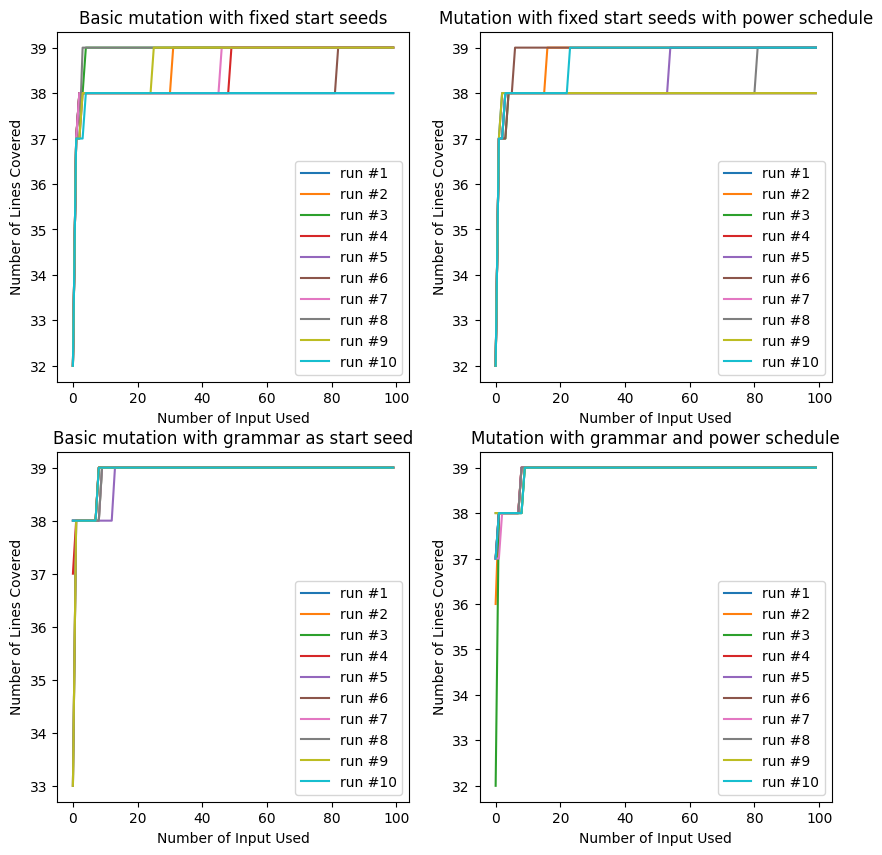

In [15]:
all_cgi(cgi_grammar)